In [67]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps

from config.py import census_key,g_key

gmaps.configure(g_key)
print(g_key)

SyntaxError: invalid syntax (config.py, line 2)

In [4]:
data = pd.read_csv("../Output/census_data.csv")
data

,city,zipcode,population,per_capita_income,white,african_american,native_american,asian,native_hawaiian_pacific_islander,other_race,two_or_more_races,white_not_hispanic,hispanic_or_latino
0,Philadelphia,19102,4937.0,87197.0,3842.0,220.0,11.0,809.0,0.0,14.0,41.0,3583.0,259.0
1,Philadelphia,19103,24219.0,78815.0,18731.0,1499.0,72.0,2840.0,31.0,103.0,943.0,17468.0,1377.0
2,Philadelphia,19104,54311.0,15478.0,20419.0,22962.0,291.0,7662.0,62.0,838.0,2077.0,18782.0,2766.0
3,Philadelphia,19106,12375.0,82364.0,10179.0,1054.0,0.0,798.0,0.0,62.0,282.0,9495.0,797.0
4,Philadelphia,19107,13696.0,49131.0,8085.0,1117.0,73.0,3720.0,0.0,131.0,570.0,7600.0,703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Seattle,98136,16607.0,60543.0,14120.0,622.0,55.0,729.0,13.0,253.0,815.0,13569.0,949.0
178,Seattle,98144,31845.0,49610.0,15333.0,5316.0,363.0,6341.0,49.0,2056.0,2387.0,13943.0,3772.0
179,Seattle,98164,155.0,163222.0,123.0,0.0,0.0,32.0,0.0,0.0,0.0,123.0,0.0
180,Seattle,98177,21619.0,59544.0,17824.0,325.0,154.0,1735.0,0.0,196.0,1385.0,17167.0,882.0


In [5]:
bycity = data.groupby("city").sum()
bycity.head()

,zipcode,population,per_capita_income,white,african_american,native_american,asian,native_hawaiian_pacific_islander,other_race,two_or_more_races,white_not_hispanic,hispanic_or_latino
city,,,,,,,,,,,,
Atlanta,818394,675827.0,1211217.0,267372.0,354356.0,3727.0,24602.0,202.0,8816.0,16752.0,245199.0,37535.0
Dallas,4510885,1734824.0,2222587.0,1125288.0,355474.0,6133.0,88972.0,791.0,114476.0,43690.0,643841.0,615680.0
Indianapolis,1109349,645767.0,662818.0,373849.0,207944.0,2122.0,13596.0,395.0,26610.0,21251.0,330747.0,73514.0
Philadelphia,880010,1575729.0,1446073.0,649097.0,666047.0,5843.0,112651.0,769.0,93651.0,47671.0,545853.0,227849.0
Seattle,2453115,712024.0,1557262.0,494041.0,46271.0,3999.0,101546.0,2321.0,15820.0,48026.0,469128.0,46277.0


In [6]:
races = bycity.columns[3:]

for race in races:
    bycity[f'{race}%'] = bycity[race]/bycity['population']

In [7]:
bycity.columns[13:]

Index(['african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%'],
      dtype='object')

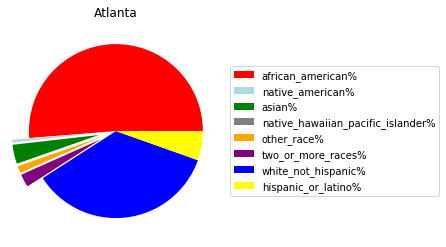

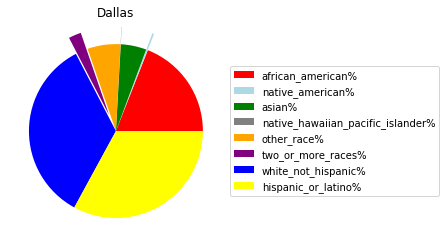

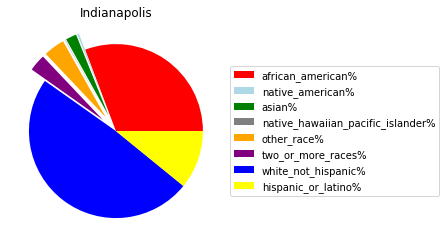

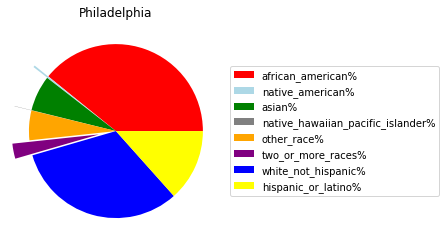

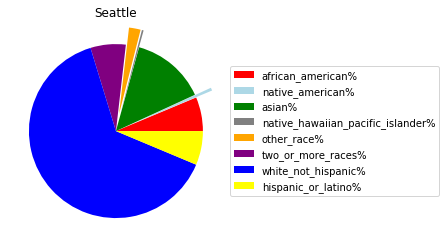

In [17]:
labels = bycity.columns[13:]
colours = ('red','lightblue','green','grey','orange','purple','blue','yellow')
for i,row in bycity.iterrows():
    sizes = row[13:]
    explode = row[13:].apply(lambda x:x < 0.05)
    explode = explode.apply(lambda x:0.2 if x == True else 0)
    plt.pie(sizes,colors = colours, explode = explode)
    plt.legend(labels, loc = 'center left',bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(i)    
    plt.savefig(f"../Output/piechart_race_{i}.png",bbox_inches='tight')
    plt.show()

In [39]:
data_copy = data.copy()

races = income_data.columns[3:]
for race in races:
    data_copy[f'{race}%'] = data_copy[race]/data_copy['population']

data_copy.columns

Index(['city', 'zipcode', 'population', 'per_capita_income', 'white',
       'african_american', 'native_american', 'asian',
       'native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races',
       'white_not_hispanic', 'hispanic_or_latino', 'per_capita_income%',
       'white%', 'african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%',
       'per_capita_income%%', 'white%%', 'african_american%%',
       'native_american%%', 'asian%%', 'native_hawaiian_pacific_islander%%',
       'other_race%%', 'two_or_more_races%%', 'white_not_hispanic%%',
       'hispanic_or_latino%%'],
      dtype='object')

In [40]:
lat_log = pd.read_csv('../Resources/us-zip-code-latitude-and-longitude.csv', sep = ';')
lat_log = lat_log[['Zip','geopoint']]

In [49]:
data = pd.merge(lat_log,data_copy, how = 'right', right_on = 'zipcode', left_on = 'Zip')
data.drop(columns= 'zipcode', inplace = True)
data.rename(columns = {'Zip':'zipcode'},inplace = True)
data.columns

Index(['zipcode', 'geopoint', 'city', 'population', 'per_capita_income',
       'white', 'african_american', 'native_american', 'asian',
       'native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races',
       'white_not_hispanic', 'hispanic_or_latino', 'per_capita_income%',
       'white%', 'african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%',
       'per_capita_income%%', 'white%%', 'african_american%%',
       'native_american%%', 'asian%%', 'native_hawaiian_pacific_islander%%',
       'other_race%%', 'two_or_more_races%%', 'white_not_hispanic%%',
       'hispanic_or_latino%%'],
      dtype='object')

In [62]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
heatmap_layer = gmaps.heatmap(location = data['geopoint'],weight = data['per_capita_income'])

TypeError: 'module' object is not callable

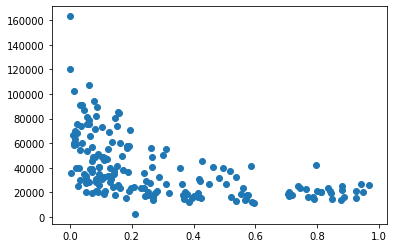

In [10]:
plt.scatter(income_data['african_american%'],income_data['per_capita_income'])

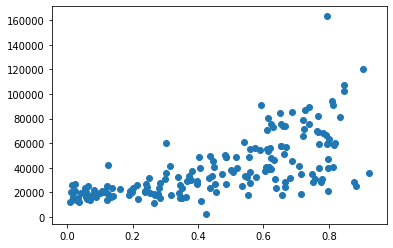

In [11]:
plt.scatter(income_data['white_not_hispanic%'],income_data['per_capita_income'])